In [109]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [110]:
Dataset_final = pd.read_csv('Dataset_final_v2.csv',parse_dates=['Date'])
Dataset_final.dataframeName = 'Dataset_final_v2.csv'
display(Dataset_final.head())
print(Dataset_final.shape)
#Dataset_final.set_index('Date',inplace=True)
Dataset_final.sort_values(by=['Date'],inplace=True)

train = ('2008-08-08' <= Dataset_final['Date']) & (Dataset_final['Date'] < '2011-08-08')
vali = ('2011-08-08' <= Dataset_final['Date']) & (Dataset_final['Date'] < '2012-08-08')
test = ('2012-08-08' <= Dataset_final['Date']) & (Dataset_final['Date'] < '2016-08-08')



,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Apple returns,Apple 50_m_avg,Apple 250_m_avg,Apple Label,Apple flows,Microsoft returns,Microsoft 50_m_avg,Microsoft 250_m_avg,Microsoft Label,Microsoft flows
0,2008-08-08,-0.5994,0.0000,-0.3612,-0.7089,-0.9260,0.0000,-0.2732,0.2144,-0.5719,...,0.023375,-0.001033,0.001552,1,10406200.0,-0.008210,0.000229,0.000003,0,-1751700.0
1,2008-08-11,0.8156,-0.3182,0.4404,-0.1965,0.0000,-0.4939,-0.5106,-0.0772,-0.6688,...,0.018100,-0.000666,0.001706,1,44326800.0,0.007854,0.000435,0.000014,0,-12070300.0
2,2008-08-12,0.0258,0.0000,-0.7845,-0.6124,0.0000,-0.6908,-0.5994,-0.5994,0.3400,...,0.014437,-0.000644,0.001539,1,-13756400.0,-0.007496,0.000267,-0.000048,1,-5930800.0
3,2008-08-13,-0.7184,-0.8074,-0.6369,-0.1280,-0.5106,0.0000,0.2960,0.0000,0.3612,...,0.000112,-0.001500,0.001453,0,1516900.0,0.000000,-0.000349,-0.000064,1,-11647800.0
4,2008-08-14,0.2023,0.0000,0.6808,-0.8689,-0.6124,-0.6369,0.7177,-0.4404,-0.6808,...,-0.020166,-0.001136,0.001273,1,-32761400.0,-0.003589,0.000145,-0.000055,0,-1432900.0


(1989, 40)


In [111]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
from sklearn.decomposition import PCA
RS = 123

In [112]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [113]:
x_subset = Dataset_final.drop(columns=['Date','Apple returns','Microsoft returns','Microsoft Label','Apple Label'],axis=1)
y_subset_appl = Dataset_final['Apple Label']
y_subset_msft = Dataset_final['Microsoft Label']

time_start = time.time()

pca = PCA(n_components=35)
pca_result = pca.fit_transform(x_subset)
pca_df = pd.DataFrame(pca_result)
pca_df


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,9.946655e+06,-3.715691e+06,1.509113,0.417900,0.366817,-0.087066,0.353154,0.169765,0.218717,-0.578222,...,0.360610,0.273767,0.452392,0.097044,0.034591,0.000443,-0.001798,0.000169,0.003340,0.000450
1,4.122977e+07,-2.040243e+07,-0.392851,-0.344245,0.960654,0.344294,-0.305198,-0.423217,-0.311565,0.202434,...,-0.006273,-0.165440,0.322327,-0.020145,0.008691,0.000234,-0.002268,-0.000303,-0.001858,0.000333
2,-1.456794e+07,-3.140719e+06,0.304822,0.348759,0.242568,0.540431,0.722434,0.081209,0.178384,0.517024,...,0.258010,0.202444,-0.646434,0.461184,-0.018463,-0.000072,-0.001459,-0.000016,-0.000749,0.000419
3,-6.894128e+05,-1.170484e+07,0.569038,0.258126,-0.672486,-0.260889,0.280427,0.487158,-0.573086,0.456942,...,0.260367,0.123677,0.251262,0.491133,-0.008810,0.001047,-0.002001,0.000485,-0.005013,0.000213
4,-3.234353e+07,4.949368e+06,-0.158551,-0.161563,0.559889,-0.036580,0.457400,-0.680133,-0.466990,-1.322341,...,0.164593,-0.251187,0.197763,-0.069743,0.006711,0.000690,-0.001796,0.000069,0.001602,0.000467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,-4.529697e+07,-7.592643e+07,0.455696,-0.432000,-0.353516,0.302610,0.649905,-0.425026,0.481032,0.640430,...,-0.619411,0.143535,-0.427076,-0.588702,-0.025989,0.002194,0.000364,0.002094,0.000913,-0.000866
1985,-7.209793e+06,-1.085499e+07,0.628467,-0.580368,0.900665,0.468324,-0.640568,0.125901,-0.691782,0.409470,...,-0.409020,0.186688,-0.022002,0.559406,0.023515,0.002966,-0.000150,0.002144,-0.000609,-0.000785
1986,-5.086712e+06,-5.933877e+06,0.831693,0.170723,-0.042925,-0.732324,-0.338916,0.295365,-0.566271,-0.522096,...,-0.696121,0.433779,0.807350,-0.127632,0.023300,0.002014,-0.000180,0.001804,0.000659,-0.000716
1987,-1.142601e+06,-2.572993e+06,1.176827,0.426330,0.655796,-0.088678,0.008305,0.228815,-0.793045,-0.040848,...,-0.113059,0.153967,0.125632,-0.147690,0.017395,0.001557,0.000284,0.000636,0.000611,-0.000563


ValueError: too many values to unpack (expected 2)

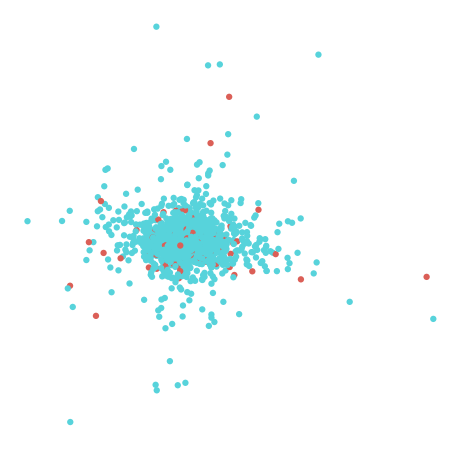

In [114]:
fashion_scatter(pca_df.values,y_subset_appl)

ValueError: too many values to unpack (expected 2)

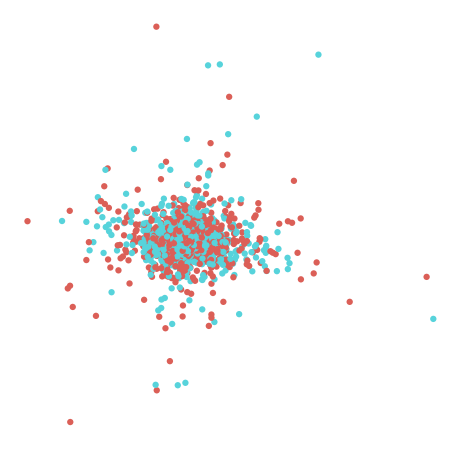

In [115]:
fashion_scatter(pca_df.values,y_subset_msft)

In [116]:
from sklearn.manifold import TSNE

In [117]:
fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

(<Figure size 576x576 with 1 Axes>,
 [Text(-0.027622446, -2.0019538, '0'), Text(5.663114, 0.6228971, '1')])

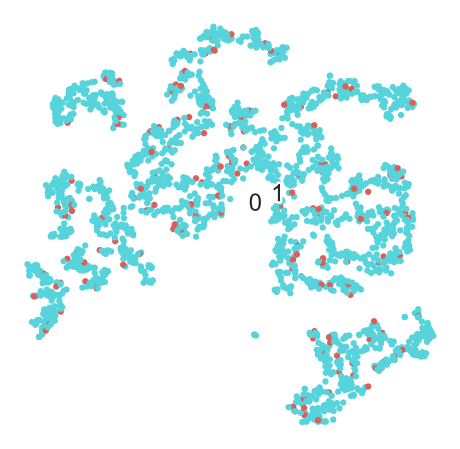

In [118]:
fashion_scatter(fashion_tsne, y_subset_appl)

(<Figure size 576x576 with 1 Axes>,
 [Text(5.873805, 0.61723965, '0'), Text(4.988546, -0.65401983, '1')])

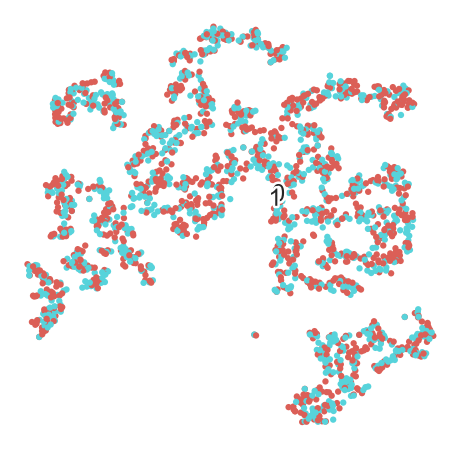

In [119]:
fashion_scatter(fashion_tsne, y_subset_msft)